# Uber Eats USA Restaurants and Menus
This dataset contains lists of Restaurants and their menus in the USA that are partnered with Uber Eats.

We are going to investigate this dataset and pose some questions for our analysis.

###  Asking Questions
1. How many Restaurants are there in each state?
2. How mant Restaurants are there based on price range?
3. Top 10 Cities which have more restaurants?
4. What are the Most Popular/Highly Rated Restaurants?
5. Is there any correlation between score and ratings?
6. Is there any relationship between the price level and the popularity of a restaurant?
7. What are the most popular items on menu?
8. Which are the most common categories in the USA?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Madhuri\\Complete-Python-3-Bootcamp-master\\data analysis project'

In [3]:
os.chdir('C:\\Users\\Madhuri\\downloads')

In [4]:
#Loading the dataset
df = pd.read_csv('restaurants.csv')
df.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [5]:
df_menus = pd.read_csv('restaurant-menus.csv')
df_menus.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


### Exploring the datasets

In [6]:
df.isna().sum()

id                 0
position           0
name               0
score           2831
ratings         2831
category           1
price_range      581
full_address      22
zip_code          22
lat                0
lng                0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
#Summary of data
df.describe()

,id,position,score,ratings,lat,lng
count,5000.000000,5000.000000,2169.000000,2169.000000,5000.000000,5000.000000
mean,2500.500000,46.047600,4.486860,52.863071,41.116198,-89.296382
std,1443.520003,60.626199,0.319114,42.944594,4.433820,5.388335
min,1.000000,1.000000,3.000000,10.000000,0.000000,-110.990240
25%,1250.750000,7.000000,4.300000,21.000000,41.786997,-89.301703
50%,2500.500000,21.000000,4.600000,40.000000,43.034474,-88.044550
75%,3750.250000,59.000000,4.700000,74.000000,43.330985,-87.782616
max,5000.000000,300.000000,5.000000,200.000000,46.821790,0.000000


In [9]:
df.dtypes

id                int64
position          int64
name             object
score           float64
ratings         float64
category         object
price_range      object
full_address     object
zip_code         object
lat             float64
lng             float64
dtype: object

In [10]:
df_menus.isna().sum()

restaurant_id        0
category             0
name                 0
description      86285
price                0
dtype: int64

In [11]:
df_menus.dtypes

restaurant_id     int64
category         object
name             object
description      object
price            object
dtype: object

In [12]:
#Summary of data
df_menus.describe()

,restaurant_id
count,403240.000000
mean,2609.343344
std,1440.022540
min,1.000000
25%,1374.000000
50%,2686.000000
75%,3836.000000
max,5000.000000


In [13]:
#Replacing the values in a column
replace_dict = {"$":"Inexpensive", "$$":"Moderately expensive", "$$$":"Expensive", "$$$$":"Very expensive"}

In [14]:
df.replace({'price_range':replace_dict},inplace = True)
df.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",Inexpensive,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",Inexpensive,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,Inexpensive,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


### Creating new columns

In [15]:
df['state_code'] = df['full_address'].str.rsplit(',').str[-2].str.strip()
df['city'] = df['full_address'].str.rsplit(',').str[1].str.strip()
df.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,state_code,city
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",Inexpensive,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,AL,Birmingham
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330,AL,Birmingham
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",Inexpensive,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640,AL,Birmingham
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,Inexpensive,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614,AL,Hoover
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,AL,Birmingham


In [16]:
df_menus['price_in_USD'] = df_menus['price'].str.replace(' USD', '').astype(float)
df_menus.head()

,restaurant_id,category,name,description,price,price_in_USD
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,15.99
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,15.99
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,14.99
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,15.99
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,14.99


### Merging the datasets

In [17]:
df_final = pd.merge(df, df_menus, how='left', left_on='id',right_on='restaurant_id',validate='one_to_many')
df_final

,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,state_code,city,restaurant_id,category_y,name_y,description,price,price_in_USD
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",Inexpensive,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,AL,Birmingham,1.0,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,15.99
1,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",Inexpensive,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,AL,Birmingham,1.0,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,15.99
2,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",Inexpensive,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,AL,Birmingham,1.0,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,14.99
3,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",Inexpensive,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,AL,Birmingham,1.0,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,15.99
4,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",Inexpensive,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,AL,Birmingham,1.0,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,14.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403239,5000,11,Covered Wagon Restaurant,NaN,NaN,"Burgers, American, Sandwiches",Moderately expensive,"2013 N Rapids Rd, Manitowoc, WI, 54220",54220,44.122070,-87.708230,WI,Manitowoc,5000.0,"""Wet Your Whistle With""",Root Beer,NaN,3.95 USD,3.95
403240,5000,11,Covered Wagon Restaurant,NaN,NaN,"Burgers, American, Sandwiches",Moderately expensive,"2013 N Rapids Rd, Manitowoc, WI, 54220",54220,44.122070,-87.708230,WI,Manitowoc,5000.0,Chicken Buckets,Chicken Only (16 pcs),NaN,23.25 USD,23.25
403241,5000,11,Covered Wagon Restaurant,NaN,NaN,"Burgers, American, Sandwiches",Moderately expensive,"2013 N Rapids Rd, Manitowoc, WI, 54220",54220,44.122070,-87.708230,WI,Manitowoc,5000.0,Chicken Buckets,Chicken with Meal (8 pcs),"Served with potatoes, slaw, and rolls.",18.75 USD,18.75
403242,5000,11,Covered Wagon Restaurant,NaN,NaN,"Burgers, American, Sandwiches",Moderately expensive,"2013 N Rapids Rd, Manitowoc, WI, 54220",54220,44.122070,-87.708230,WI,Manitowoc,5000.0,Chicken Buckets,Chicken with Meal (12 pcs),"Served with potatoes, slaw, and rolls.",24.55 USD,24.55


### Cleaning the restaurants data

In [18]:
df_copy = df.copy()
df_copy.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,state_code,city
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",Inexpensive,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,AL,Birmingham
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330,AL,Birmingham
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",Inexpensive,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640,AL,Birmingham
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,Inexpensive,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614,AL,Hoover
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,AL,Birmingham


In [19]:
df_clean_score = df_copy.dropna(how='any',subset=['score','price_range'])
df_clean_score.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,state_code,city
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",Inexpensive,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,AL,Birmingham
13,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",Inexpensive,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247,AL,Gardendale
15,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",Expensive,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950,AL,Birmingham
18,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",Inexpensive,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,AL,Birmingham
19,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"American, Burgers, Sandwich",Moderately expensive,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260,AL,Gardendale


In [20]:
df_clean_score.isna().sum()

id              0
position        0
name            0
score           0
ratings         0
category        0
price_range     0
full_address    9
zip_code        9
lat             0
lng             0
state_code      9
city            9
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'position'}>],
       [<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'ratings'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lng'}>]], dtype=object)

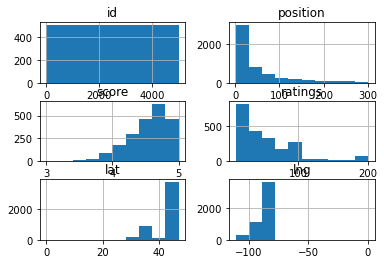

In [21]:
df.hist()

### 1. The number of restaurants in each state?

In [22]:
df['state_code'].value_counts()

WI    3509
AL    1107
WY     319
MN      43
Name: state_code, dtype: int64

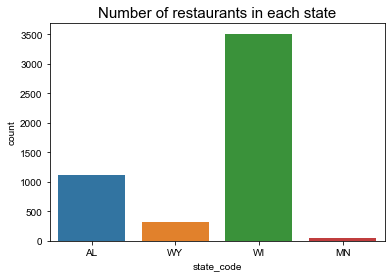

In [23]:
ax= sns.countplot(x='state_code', data=df)
ax.set_title('Number of restaurants in each state', fontsize=15)
sns.set(rc = {'figure.figsize':(10,8)})

### 2. Number of restuarants based on price range?

In [24]:
data_price = df['price_range'].value_counts()
data_price

Inexpensive             2716
Moderately expensive    1690
Expensive                 12
Very expensive             1
Name: price_range, dtype: int64

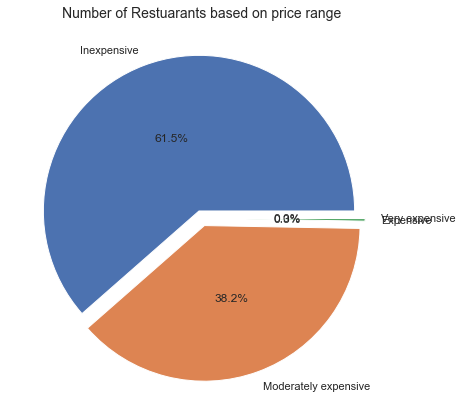

In [25]:
pie, ax = plt.subplots(figsize=[10,6])
labels = data_price.keys()
plt.pie(x=data_price, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Number of Restuarants based on price range", fontsize=14)
plt.tight_layout()

### 3. Cities which have more restaurants?

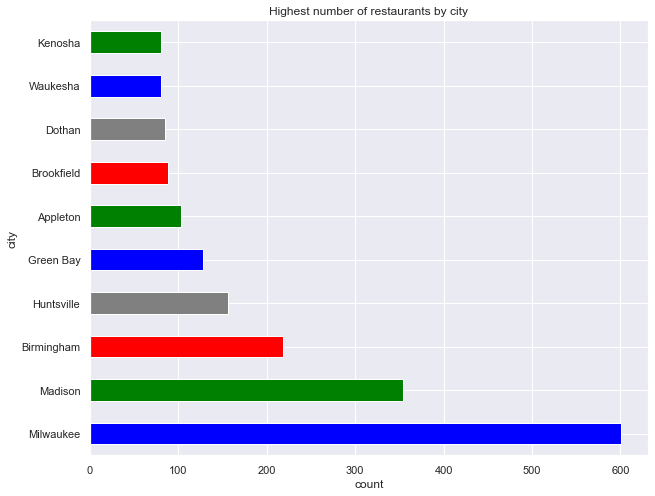

In [26]:
plt.ylabel('city')
plt.xlabel('count')
plt.title('Highest number of restaurants by city')
df.city.value_counts().sort_values(ascending= False)[:10].plot.barh(x='city',y='count',color=['blue','green','red','grey'])
plt.show()


### 4. Five star Restaurants

In [27]:
names = list(df_clean_score['name'].unique())
#names

In [28]:
keyList = ["name", "score", "state","city"]
  
# initialize dictionary
dict_score = {}
  
# iterating through the elements of list
for i in keyList:
    dict_score[i] = []
      
print(dict_score)

for i in range(len(names)):
    df_cut = df_clean_score[df_clean_score['name']==names[i]].reset_index()
    max_value = df_cut['score'].max()
    if max_value>0:
        dict_score['name'].append(names[i])
        dict_score['score'].append(max_value)
        dict_score['state'].append(df_cut['state_code'][0])
        dict_score['city'].append(df_cut['city'][0])

{'name': [], 'score': [], 'state': [], 'city': []}


In [29]:
#dict_score

In [30]:
df_top_res = pd.DataFrame(dict_score)

In [31]:
df_top_res.head()

,name,score,state,city
0,Jinsei Sushi,4.7,AL,Birmingham
1,Panera (521 Fieldstown Road),4.6,AL,Gardendale
2,Jeni's Splendid Ice Cream (Pepper Place),5.0,AL,Birmingham
3,Falafel Cafe,4.9,AL,Birmingham
4,MrBeast Burger (838 Odum Road),3.7,AL,Gardendale


In [32]:
df_top_res[df_top_res['score']==5.0]

,name,score,state,city
2,Jeni's Splendid Ice Cream (Pepper Place),5.0,AL,Birmingham
49,Wasabi Juan's (Downtown),5.0,AL,Birmingham
96,"Honey Baked Ham (7001 Crestwood Blvd, Ste 114)",5.0,AL,Ste 114
106,Cookie Dough Magic,5.0,AL,102
120,Papa Johns (736 Montgomery Hwy),5.0,AL,Vestavia Hills
134,Mr. Lin Chinese Restaurant,5.0,AL,Helena
149,Great American Cookies (Riverchase Galleria),5.0,AL,Birmingham
252,Tropical Smoothie Cafe - 3230 Ross Clark Circl...,5.0,AL,Suite 3
261,Firehouse Subs (3255 South Oates Street. Suite 8),5.0,AL,Dothan
312,Hunt Brothers Pizza,5.0,AL,Huntsville


Text(0.5, 1.0, 'Five star Restaurants by City')

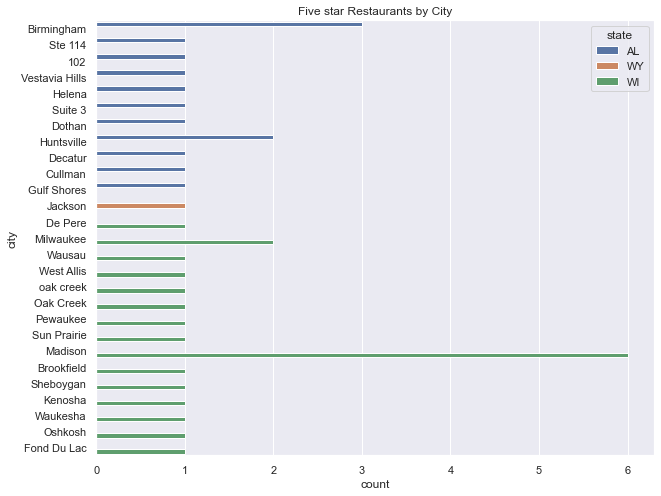

In [33]:
ax1 = sns.countplot(y='city',hue='state', data = df_top_res[df_top_res['score']==5.0])
sns.set(rc = {'figure.figsize':(15,20)})
ax1.set_title('Five star Restaurants by City')

### 5. Correlation between score and ratings

In [34]:
df.corr()

,id,position,score,ratings,lat,lng
id,1.000000,-0.081493,-0.000612,-0.013252,0.694431,0.063428
position,-0.081493,1.000000,0.044481,-0.028971,0.030748,0.146040
score,-0.000612,0.044481,1.000000,0.105440,0.011305,0.005427
ratings,-0.013252,-0.028971,0.105440,1.000000,0.036080,0.103980
lat,0.694431,0.030748,0.011305,0.036080,1.000000,-0.342392
lng,0.063428,0.146040,0.005427,0.103980,-0.342392,1.000000


As we can see from the table above, there is little or no correlation between score and ratings.

### 6. Is there any relationship between the price level and the popularity of a restaurant?

<AxesSubplot:title={'center':'score'}, xlabel='price_range'>

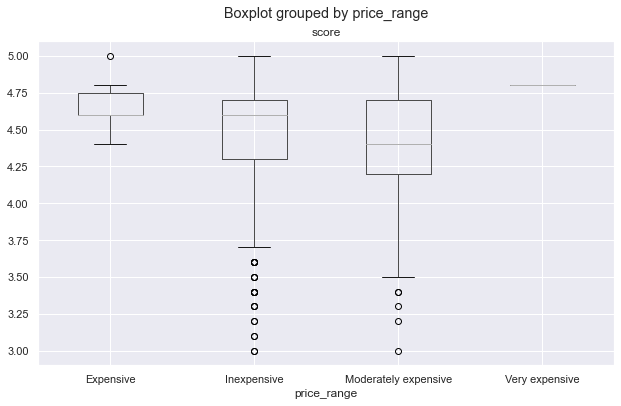

In [35]:
df.boxplot(column='score',by='price_range', figsize=(10,6))

A box plot shows the data distribution of the continuous variable for each category. If the distribution for each of the categories is similar, which means the boxes are aligned, then, it indicates no correlation.

Similarly, if the data distribution is different for each category, which means the boxes are far from each other, then, it indicates that there is a correlation between the two variables.

From the figure above we can say that there is slight correlation between price and popularity of the restaurant.

### 7. Most popular items on menu

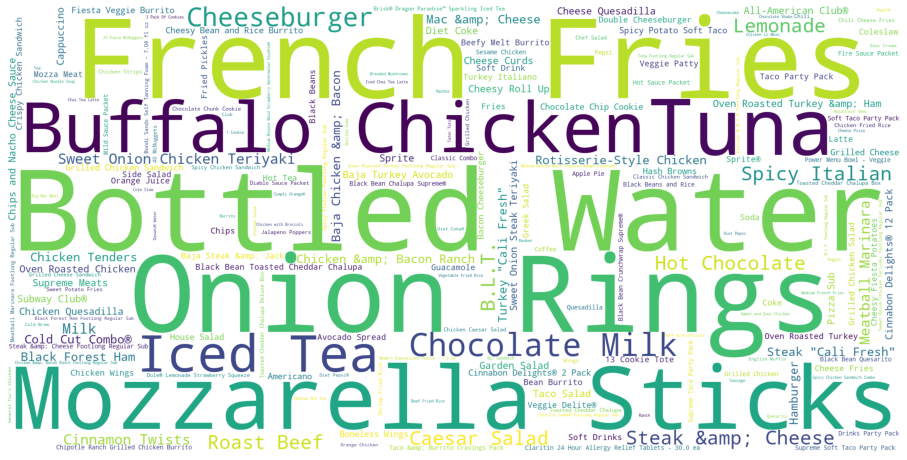

In [36]:
plt.figure(figsize=(16,10))
data = df_menus['name'].value_counts().to_dict()
wc = WordCloud(width= 2000, height = 1000, random_state=1,background_color='white').generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

### 8. Most popular categories on menu

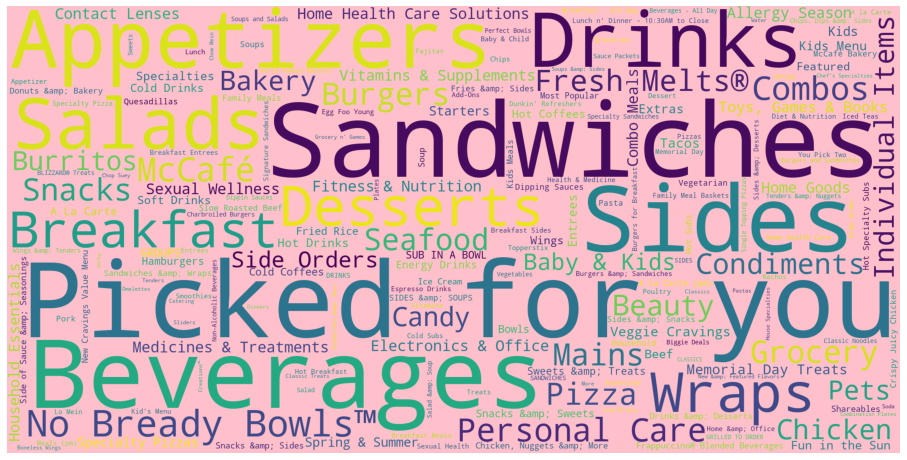

In [37]:
plt.figure(figsize=(16,10))
data1 = df_menus['category'].value_counts().to_dict()
wc1 = WordCloud(width= 2000, height = 1000, random_state=1,background_color='pink').generate_from_frequencies(data1)
plt.imshow(wc1)
plt.axis('off')
plt.show()

## Inferences
Based on the data,
- More number of restuarants are located in Wisconsin followed by Alabama
- 61 percent of the restuarants are inexpensive
- Highest number of restuarants are found in Milwaukee, Madison, Birmingham etc.
- As we have seen there is a slight correlation between price and popularity of the restaurant.
- The items that are found most on menu are French fries, Onion Rings, Mozzarella Sticks etc